# California housing dataset

We'll be re-doing the example from chapter 2 of _Hands-on machine learning with Scikit-Learn, Keras & TensorFlow_. The text is heavily derived from that book and included here purely for didactive purposes.

## Loading the data

The data is already in our root directory. We'll use the `readCsv` function to read the data into a dataframe.

In [1]:
import qualified DataFrame as D

df <- D.readCsv "./housing.csv"

## Take a Quick Look at the Data Structure

Let’s take a look at the top five rows using the DataFrame’s `take` function.

In [2]:
D.take 5 df

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
index<br>Int | longitude<br>Double | latitude<br>Double | housing_median_age<br>Double | total_rooms<br>Double | total_bedrooms<br>Maybe Double | population<br>Double | households<br>Double | median_income<br>Double | median_house_value<br>Double | ocean_proximity<br>Text
-------------|---------------------|--------------------|------------------------------|-----------------------|--------------------------------|----------------------|----------------------|-------------------------|------------------------------|------------------------
0            | -122.23             | 37.88              | 41.0                         | 880.0                 | Just 129.0                     | 322.0                | 126.0                | 8.3252                  | 452600.0                     | NEAR BAY               
1            | -122.22             | 37.86              | 21.0                         | 7099.0                | Just 1106.0                    | 2401.0               | 1138.0               | 8.3014                  | 358500.0                     | NEAR BAY               
2            | -122.24             | 37.85              | 52.0                         | 1467.0                | Just 190.0                     | 496.0                | 177.0                | 7.2574                  | 352100.0                     | NEAR BAY               
3            | -122.25             | 37.85              | 52.0                         | 1274.0                | Just 235.0                     | 558.0                | 219.0                | 5.6431000000000004      | 341300.0                     | NEAR BAY               
4            | -122.25             | 37.85              | 52.0                         | 1627.0                | Just 280.0                     | 565.0                | 259.0                | 3.8462                  | 342200.0                     | NEAR BAY               


Each row represents one district. There are 10 attributes: _longitude_, _latitude_, _housing_median_age_, total_rooms, _total_bedrooms_, _population_, _households_, _median_income_, _median_house_value_, and _ocean_proximity_.

We can already tell from the types that _total_bedrooms_ will have null values since it's type is `Maybe Double`. How many nulls does it have? We can get a summary of all rows using the `columnInfo` function.

In [3]:
D.describeColumns df

--------------------------------------------------------------------------------------------------------------------------------------------------------
index<br>Int | Column Name<br>Text | # Non-null Values<br>Int | # Null Values<br>Int | # Partially parsed<br>Int | # Unique Values<br>Int | Type<br>Text
-------------|---------------------|--------------------------|----------------------|---------------------------|------------------------|-------------
0            | total_bedrooms      | 20433                    | 207                  | 0                         | 1924                   | Maybe Double
1            | ocean_proximity     | 20640                    | 0                    | 0                         | 5                      | Text        
2            | median_house_value  | 20640                    | 0                    | 0                         | 3842                   | Double      
3            | median_income       | 20640                    | 0                    | 0                         | 12928                  | Double      
4            | households          | 20640                    | 0                    | 0                         | 1815                   | Double      
5            | population          | 20640                    | 0                    | 0                         | 3888                   | Double      
6            | total_rooms         | 20640                    | 0                    | 0                         | 5926                   | Double      
7            | housing_median_age  | 20640                    | 0                    | 0                         | 52                     | Double      
8            | latitude            | 20640                    | 0                    | 0                         | 862                    | Double      
9            | longitude           | 20640                    | 0                    | 0                         | 844                    | Double      


There are 20,640 instances in the dataset, which means that it is fairly small by
Machine Learning standards, but it’s perfect to get started. Notice that the total_bed
rooms attribute has only 20,433 non-null values, meaning that 207 districts are miss‐
ing this feature. We will need to take care of this later.

_ocean_proximity_ has only 5 unique values. Let's look at what those values are:

In [4]:
:set -XOverloadedStrings

D.frequencies "ocean_proximity" df

-------------------------------------------------------------------------------------------------------------------------
index<br>Int | Statistic<br>Text | <1H OCEAN<br>Int | INLAND<br>Int | ISLAND<br>Int | NEAR BAY<br>Int | NEAR OCEAN<br>Int
-------------|-------------------|------------------|---------------|---------------|-----------------|------------------
0            | Count             | 9136             | 6551          | 5             | 2290            | 2658             
1            | Percentage (%)    | 44               | 31            | 0             | 11              | 12               


Let’s look at the other fields. The describe() method shows a summary of the
numerical attributes

In [5]:
D.summarize df

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
index<br>Int | Statistic<br>Text | longitude<br>Double | latitude<br>Double | housing_median_age<br>Double | total_rooms<br>Double | population<br>Double | households<br>Double | median_income<br>Double | median_house_value<br>Double
-------------|-------------------|---------------------|--------------------|------------------------------|-----------------------|----------------------|----------------------|-------------------------|-----------------------------
0            | Mean              | -119.57             | 35.63              | 28.64                        | 2635.76               | 1425.48              | 499.54               | 3.87                    | 206855.82                   
1            | Minimum           | -124.35             | 32.54              | 1.0                          | 2.0                   | 3.0                  | 1.0                  | 0.5                     | 14999.0                     
2            | 25%               | -121.8              | 33.93              | 18.0                         | 1447.42               | 787.0                | 280.0                | 2.56                    | 119600.0                    
3            | Median            | -118.49             | 34.26              | 29.0                         | 2127.0                | 1166.0               | 409.0                | 3.53                    | 179700.0                    
4            | 75%               | -118.01             | 37.71              | 37.0                         | 3148.0                | 1725.0               | 605.0                | 4.74                    | 264758.33                   
5            | Max               | -114.31             | 41.95              | 52.0                         | 39320.0               | 35682.0              | 6082.0               | 15.0                    | 500001.0                    
6            | StdDev            | 2.0                 | 2.14               | 12.59                        | 2181.56               | 1132.43              | 382.32               | 1.9                     | 115392.82                   
7            | IQR               | 3.79                | 3.78               | 19.0                         | 1700.58               | 938.0                | 325.0                | 2.18                    | 145158.33                   
8            | Skewness          | -0.3                | 0.47               | 6.0e-2                       | 4.15                  | 4.94                 | 3.41                 | 1.65                    | 0.98                        


The count, mean, mininum, and max rows are self-explanatory. The StdDev row shows the standard deviation, which measures how dispersed the values are. The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations falls.

For example, 25% of the districts have a housing_median_age lower than
18, while 50% are lower than 29 and 75% are lower than 37. These are often called the
25th percentile (or 1st quartile), the median, and the 75th percentile (or 3rd quartile).

Another quick way to get a feel of the type of data you are dealing with is to plot a
histogram for each numerical attribute.

In [6]:
import qualified Graphics.Gnuplot.Frame as Frame
import qualified Graphics.Gnuplot.Frame.OptionSet as Opts
import qualified Graphics.Gnuplot.Frame.OptionSet.Style as OptsStyle
import qualified Graphics.Gnuplot.Frame.OptionSet.Histogram as Histogram
import qualified Graphics.Gnuplot.Plot.TwoDimensional as Plot2D
import qualified Graphics.Gnuplot.Graph.TwoDimensional as Graph2D
import qualified Graphics.Gnuplot.LineSpecification as LineSpec

In [7]:
import qualified Data.Text as T
import qualified Data.Vector as V

plotValues :: String -> [(Double, Int)] -> Frame.T (Graph2D.T Int Double)
plotValues columnName values =
    Frame.cons (
      Opts.title columnName $
      OptsStyle.fillSolid $
      Opts.xTicks2d (zipWith
                      (\v i -> (if i `mod` 5 == 0 then (v, i) else ("", i)))
                      (map (show . round . fst) values) [0 .. ])
      Opts.deflt) $
    foldMap (fmap (Graph2D.lineSpec (LineSpec.title columnName LineSpec.deflt)) .
          Plot2D.list Graph2D.histograms) [map (fromIntegral . snd) values]

plotHistogram :: T.Text -> Int -> D.DataFrame -> Frame.T (Graph2D.T Int Double)
plotHistogram columnName numBins d = case D.getColumn columnName d of
        Nothing -> plotValues (T.unpack columnName) []
        Just column -> case D.toVectorSafe @Double column of
            Left _  -> plotValues (T.unpack columnName) []
            Right v -> let
                    values = D.calculateBins (V.toList v) numBins
                in plotValues (T.unpack columnName) values


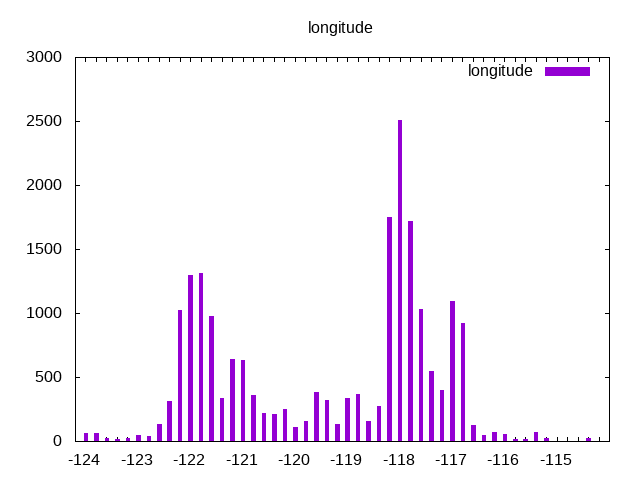

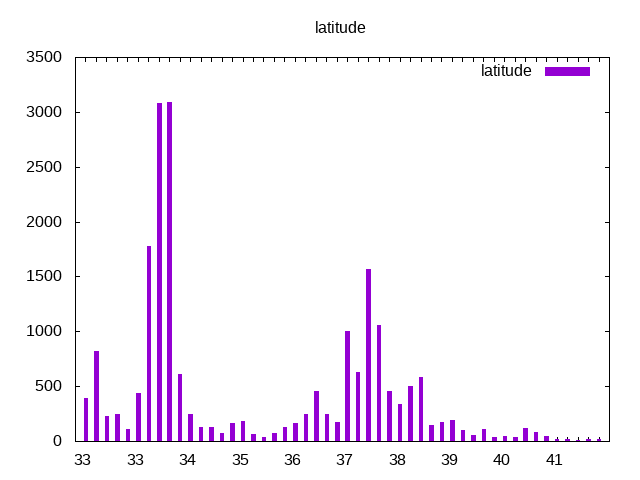

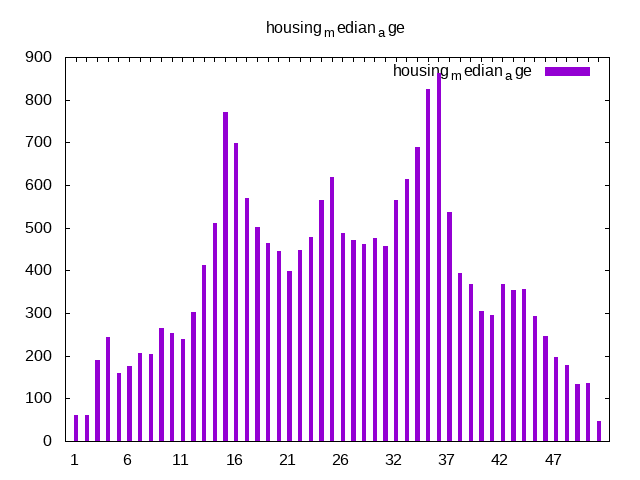

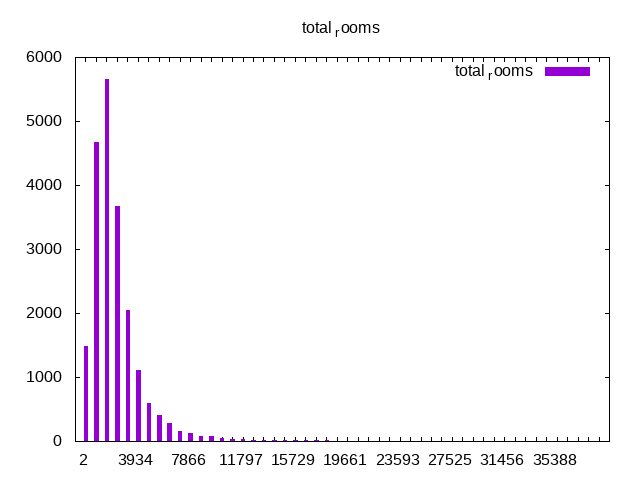

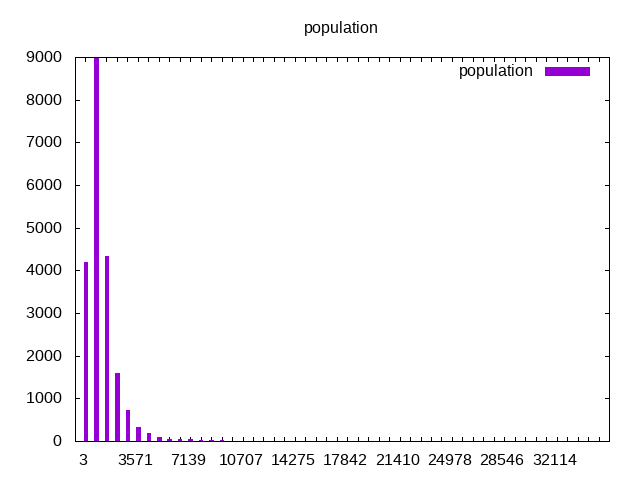

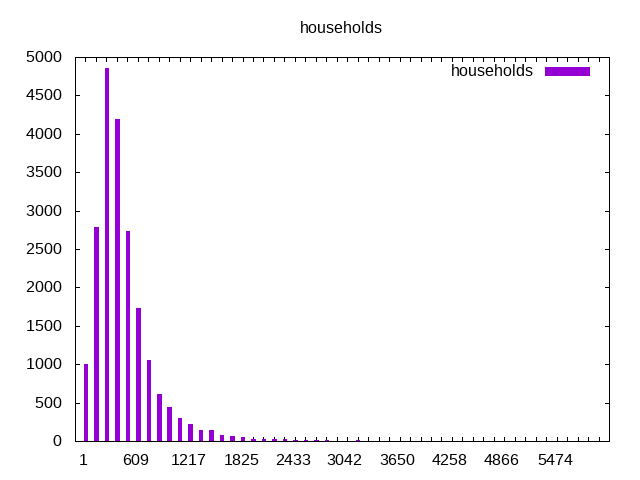

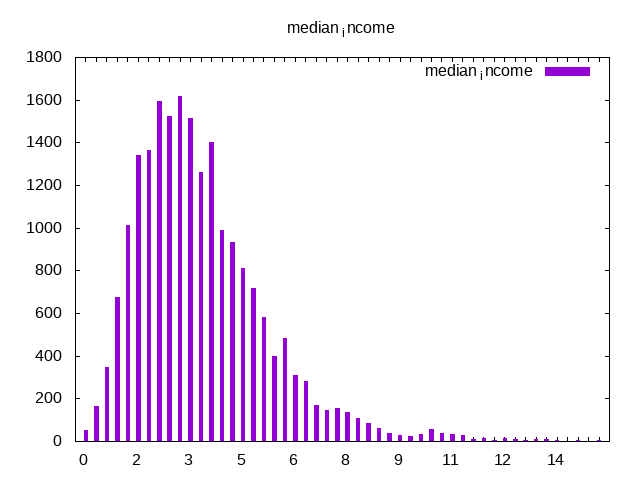

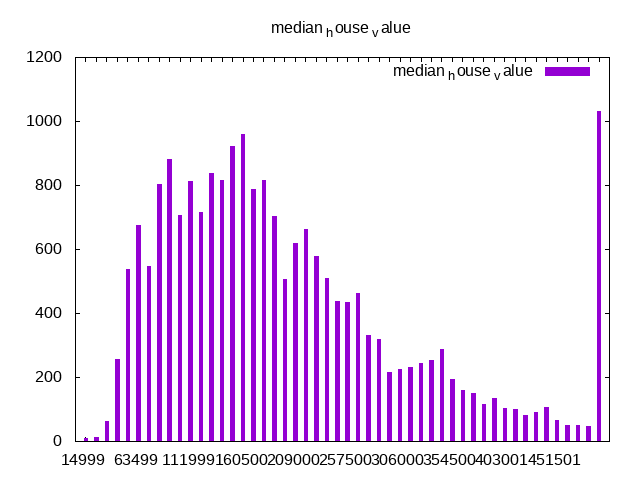

In [8]:
fmap (\name -> plotHistogram name 50 df) (D.columnNames df)

One last thing you may want to do before actually preparing the data for Machine
Learning algorithms is to try out various attribute combinations. For example, the
total number of rooms in a district is not very useful if you don’t know how many
households there are. What you really want is the number of rooms per household.
Similarly, the total number of bedrooms by itself is not very useful: you probably
want to compare it to the number of rooms. And the population per household also
seems like an interesting attribute combination to look at.


We can reference existing attributes in type-safe expressions by automatically creating references to them. We use the `declareColumns` function from `DataFrame.Functions`. This creates global references to each of the columns.

In [9]:
:set -XTemplateHaskell -- The column generating function uses TemplateHaskell so we enable it first.
import DataFrame.Functions as F

import Data.Text (Text)  -- So the compiler can refer to this type when generating columns

F.declareColumns df

Now let's declare these attributes.

In [10]:
import Data.Maybe (fromMaybe)

augmented = df D.|> D.derive "rooms_per_household" (total_rooms / households)
               D.|> D.derive "bedrooms_per_household" (F.lift (fromMaybe 0) total_bedrooms / total_rooms)
               D.|> D.derive "population_per_household" (population / households)

In [11]:
import           Control.Monad
import qualified Data.List as L
import           Data.Function

In [12]:
correlationWithHouseValue columnName = (columnName, fromMaybe 0 (D.correlation columnName "median_house_value" augmented))

correlations = map correlationWithHouseValue (D.columnNames augmented)

mapM_ print (L.sortBy (flip compare `on` snd) correlations)

("median_house_value",1.0)
("median_income",0.6880752079585478)
("rooms_per_household",0.15194828974145785)
("total_rooms",0.13415311380656308)
("housing_median_age",0.10562341249320993)
("households",6.584265057005648e-2)
("total_bedrooms",0.0)
("ocean_proximity",0.0)
("population_per_household",-2.3737412956134348e-2)
("population",-2.4649678888894896e-2)
("longitude",-4.5966615117978525e-2)
("latitude",-0.14416027687465927)
("bedrooms_per_household",-0.2387592763309236)

Hey, not bad! The new bedrooms_per_room attribute is much more correlated with
the median house value than the total number of rooms or bedrooms. Apparently
houses with a lower bedroom/room ratio tend to be more expensive. The number of
rooms per household is also more informative than the total number of rooms in a
district—obviously the larger the houses, the more expensive they are.